#### Census Income Project
### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over 
$50K a year.

#### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.

- Controls for Hispanic Origin by age and sex.

- Controls by Race, age and sex.

- We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### no null values in dataset

In [551]:
data.describe() ###statistical analysis of int and float columns

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### observation -
- capital_gain have some irregular values
- capital_loss have some irregular values
- Hours_per_week have same 25% value and 50% value soo some error in data in furthur steps we will correct it

# Data cleaning and analysis

In [552]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [553]:
features = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']

In [554]:
data.nunique().to_frame("No of Unique Values")

,No of Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [555]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### fnlwgt is continous column and all other are categorical column  

#### we can replace income more than 50k as 1 and less than 50k as 0

In [556]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

### here we can see there is some missing values which is denoted by "?" and value_count is 1836 which should be replaced by some meaning data 

In [557]:
data['Workclass'] = data['Workclass'].replace(' ?', np.nan)

In [558]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [559]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

### we have sufficient data better to drop the row to fill it with any imputer 

In [560]:
data.dropna(inplace=True)

In [561]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [562]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [563]:
data['Education'].value_counts()

 HS-grad         9969
 Some-college    6777
 Bachelors       5181
 Masters         1675
 Assoc-voc       1321
 11th            1057
 Assoc-acdm      1020
 10th             833
 7th-8th          574
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: Education, dtype: int64

In [564]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14340
 Never-married             9916
 Divorced                  4259
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

In [565]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
 ?                       7
Name: Occupation, dtype: int64

In [566]:
data['Occupation'] = data['Occupation'].replace(' ?', np.nan)
data.dropna(inplace=True)

In [567]:
data['Relationship'].value_counts()

 Husband           12704
 Not-in-family      7864
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: Relationship, dtype: int64

In [568]:
data['Race'].value_counts()

 White                 26300
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: Race, dtype: int64

In [569]:
data['Sex'].value_counts()

 Male      20787
 Female     9930
Name: Sex, dtype: int64

In [570]:
data['Native_country'].value_counts()

 United-States                 27503
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Iran                             42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

In [571]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [572]:
data['Native_country'] = data['Native_country'].replace(' ?', np.nan)

In [573]:
data['Native_country'].isnull().sum()

556

In [574]:
data.dropna(inplace=True)

In [575]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [576]:
data.shape

(30161, 15)

In [577]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Data encoding

### columns 
- #### by label_encoder- Workclass,Education,Occupation, Marital_status,Relationship,Race,Sex,Native_country,Income

In [578]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [579]:
grouped = data.groupby('Income')

for name,group in grouped:
    print(name)
    print(group)

 <=50K
       Age          Workclass  Fnlwgt      Education  Education_num  \
0       50   Self-emp-not-inc   83311      Bachelors             13   
1       38            Private  215646        HS-grad              9   
2       53            Private  234721           11th              7   
3       28            Private  338409      Bachelors             13   
4       37            Private  284582        Masters             14   
...    ...                ...     ...            ...            ...   
32552   32            Private  116138        Masters             14   
32554   22            Private  310152   Some-college             10   
32555   27            Private  257302     Assoc-acdm             12   
32557   58            Private  151910        HS-grad              9   
32558   22            Private  201490        HS-grad              9   

            Marital_status          Occupation    Relationship  \
0       Married-civ-spouse     Exec-managerial         Husband   
1       

In [580]:
col = ['Workclass','Education','Occupation','Marital_status','Relationship','Race','Sex','Native_country','Income']

In [581]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [582]:
data['Workclass']= lab_enc.fit_transform(data['Workclass'])
data['Education']= lab_enc.fit_transform(data['Education'])
data['Occupation']= lab_enc.fit_transform(data['Occupation'])
data['Marital_status']= lab_enc.fit_transform(data['Marital_status'])
data['Relationship']= lab_enc.fit_transform(data['Relationship'])
data['Race']= lab_enc.fit_transform(data['Race'])
data['Sex']= lab_enc.fit_transform(data['Sex'])
data['Native_country']= lab_enc.fit_transform(data['Native_country'])
data['Income']= lab_enc.fit_transform(data['Income'])

In [583]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


## Exploratory data analysis(EDA)

In [584]:
import warnings 
warnings.filterwarnings('ignore')

### Univariate analysis

In [585]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

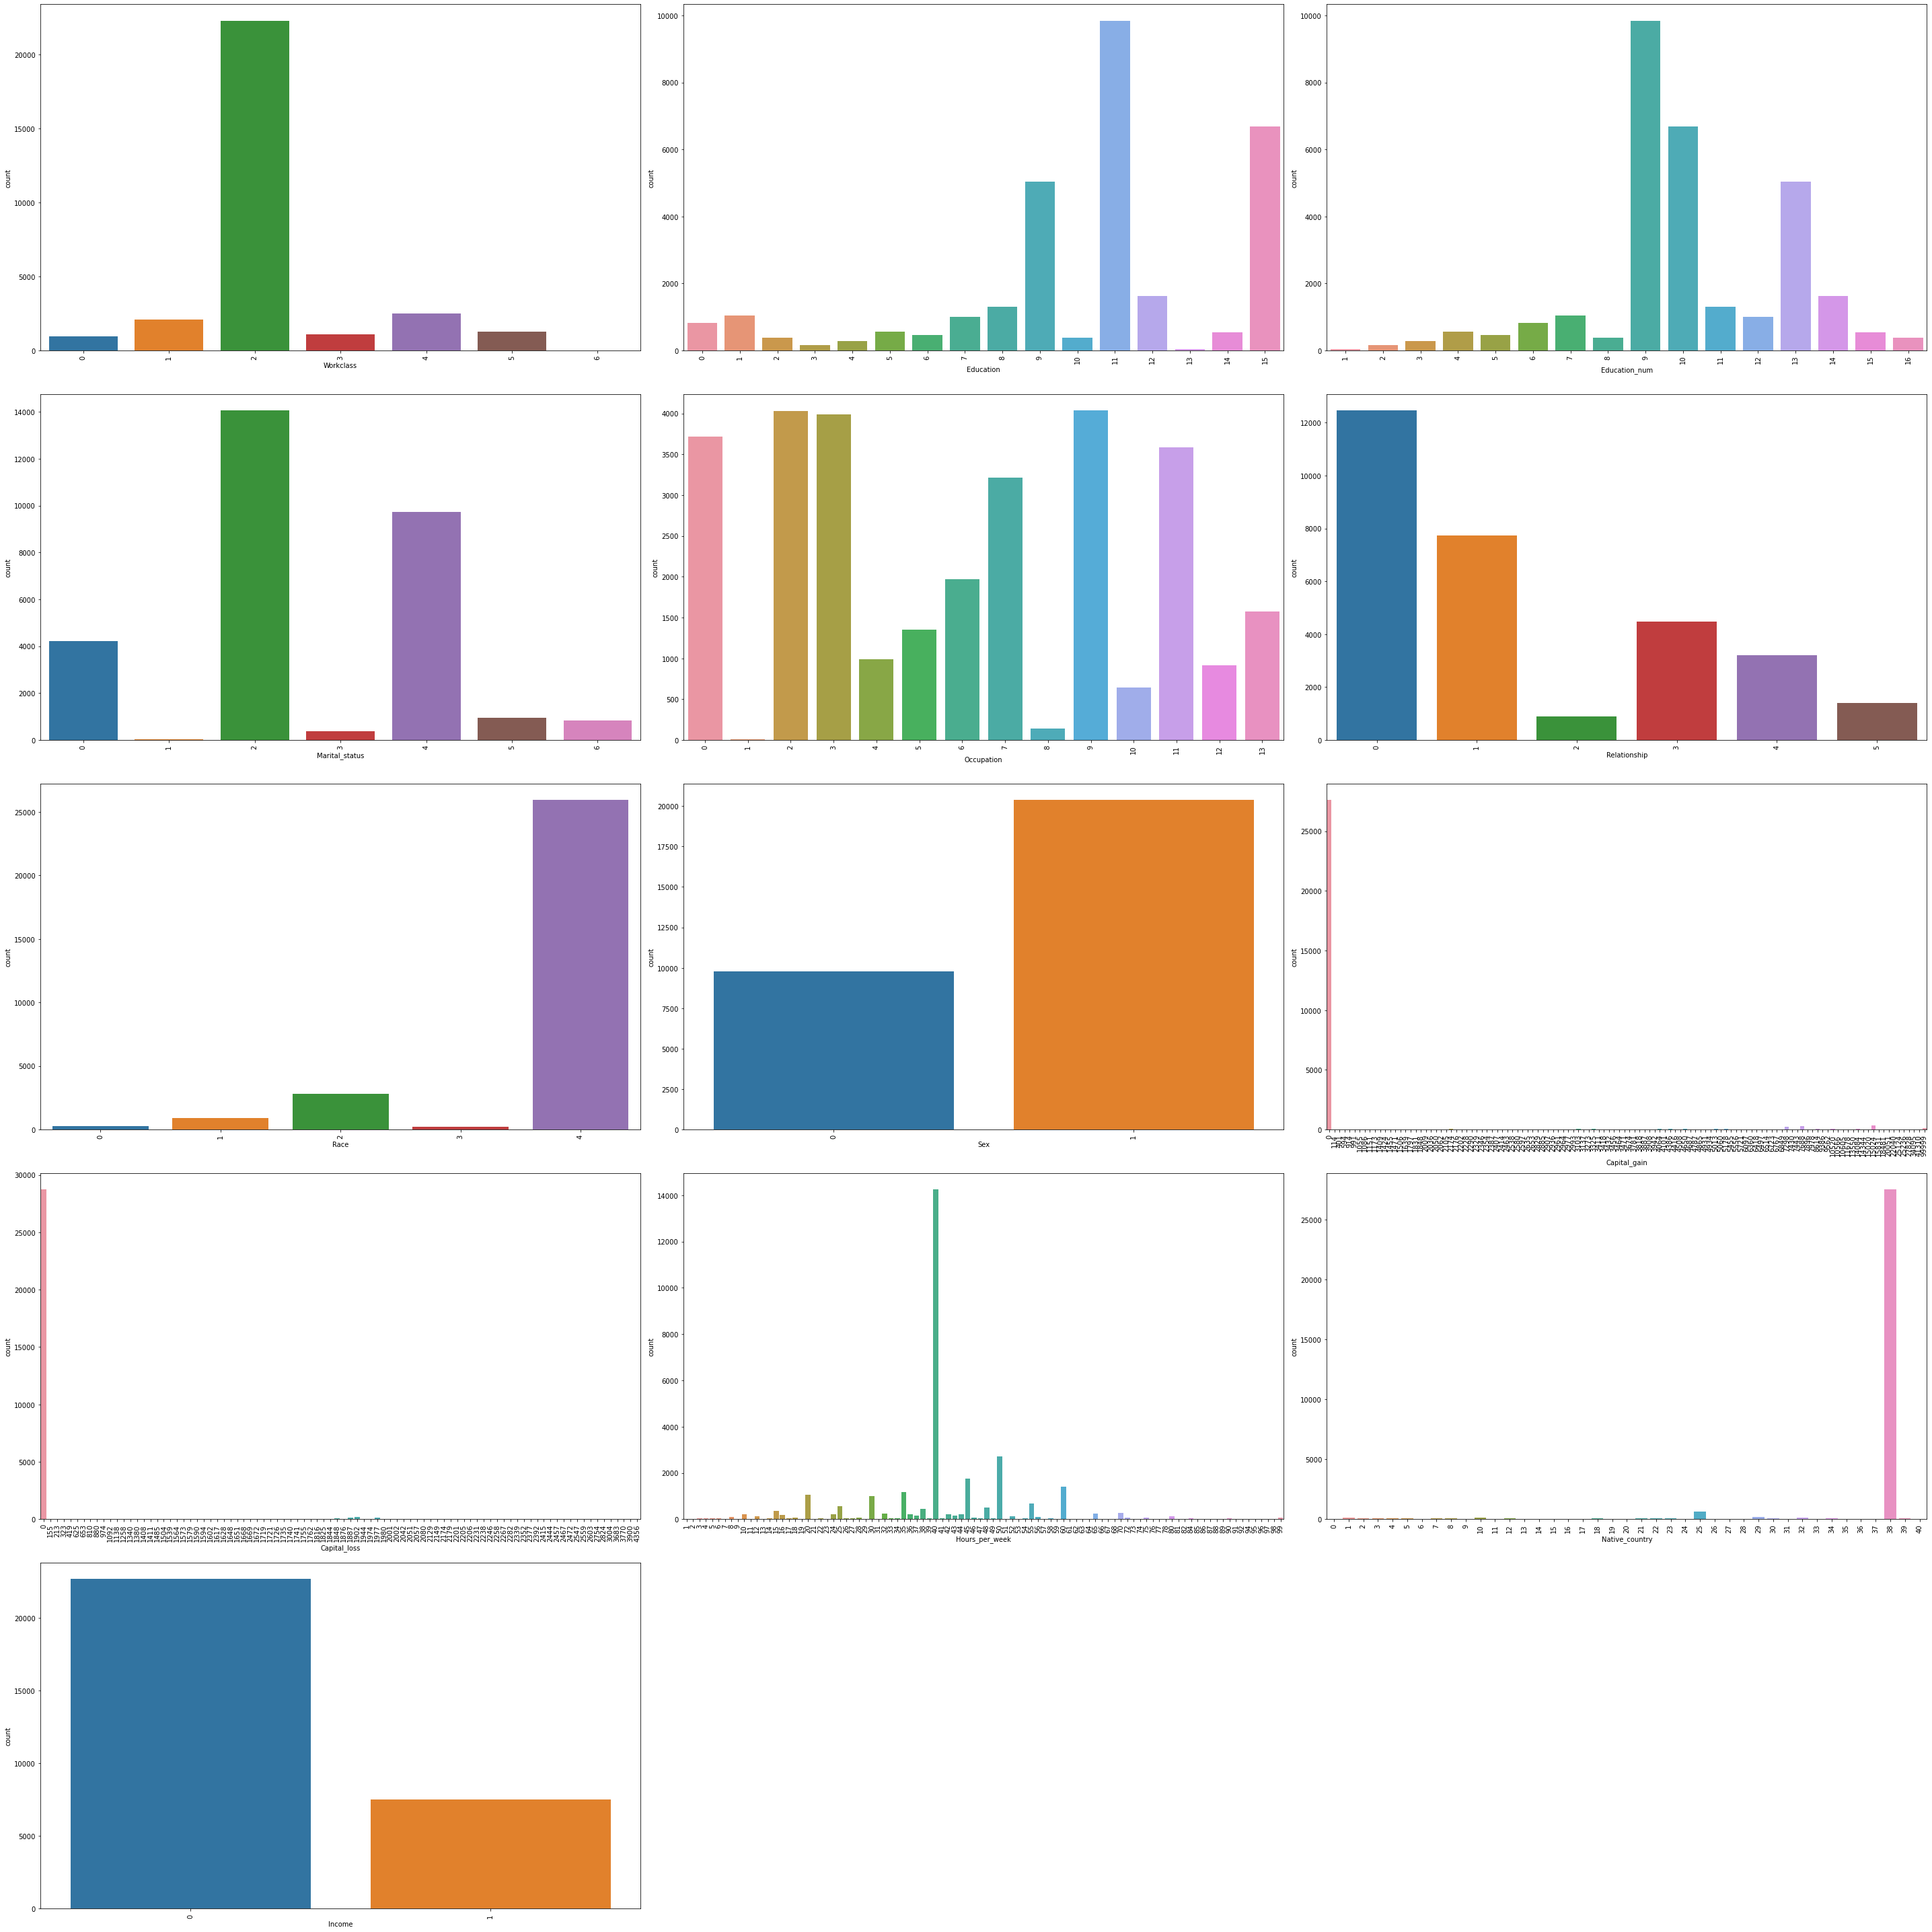

In [586]:
count_col=[ 'Workclass', 'Education', 'Education_num','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country','Income']
plt.figure(figsize=(40,40))
for i in range(len(count_col)):
  plt.subplot(5,3,i+1)
  sns.countplot(data[count_col[i]])
  plt.xticks(rotation=90)
  plt.tight_layout()

In [587]:
data.shape

(30161, 15)

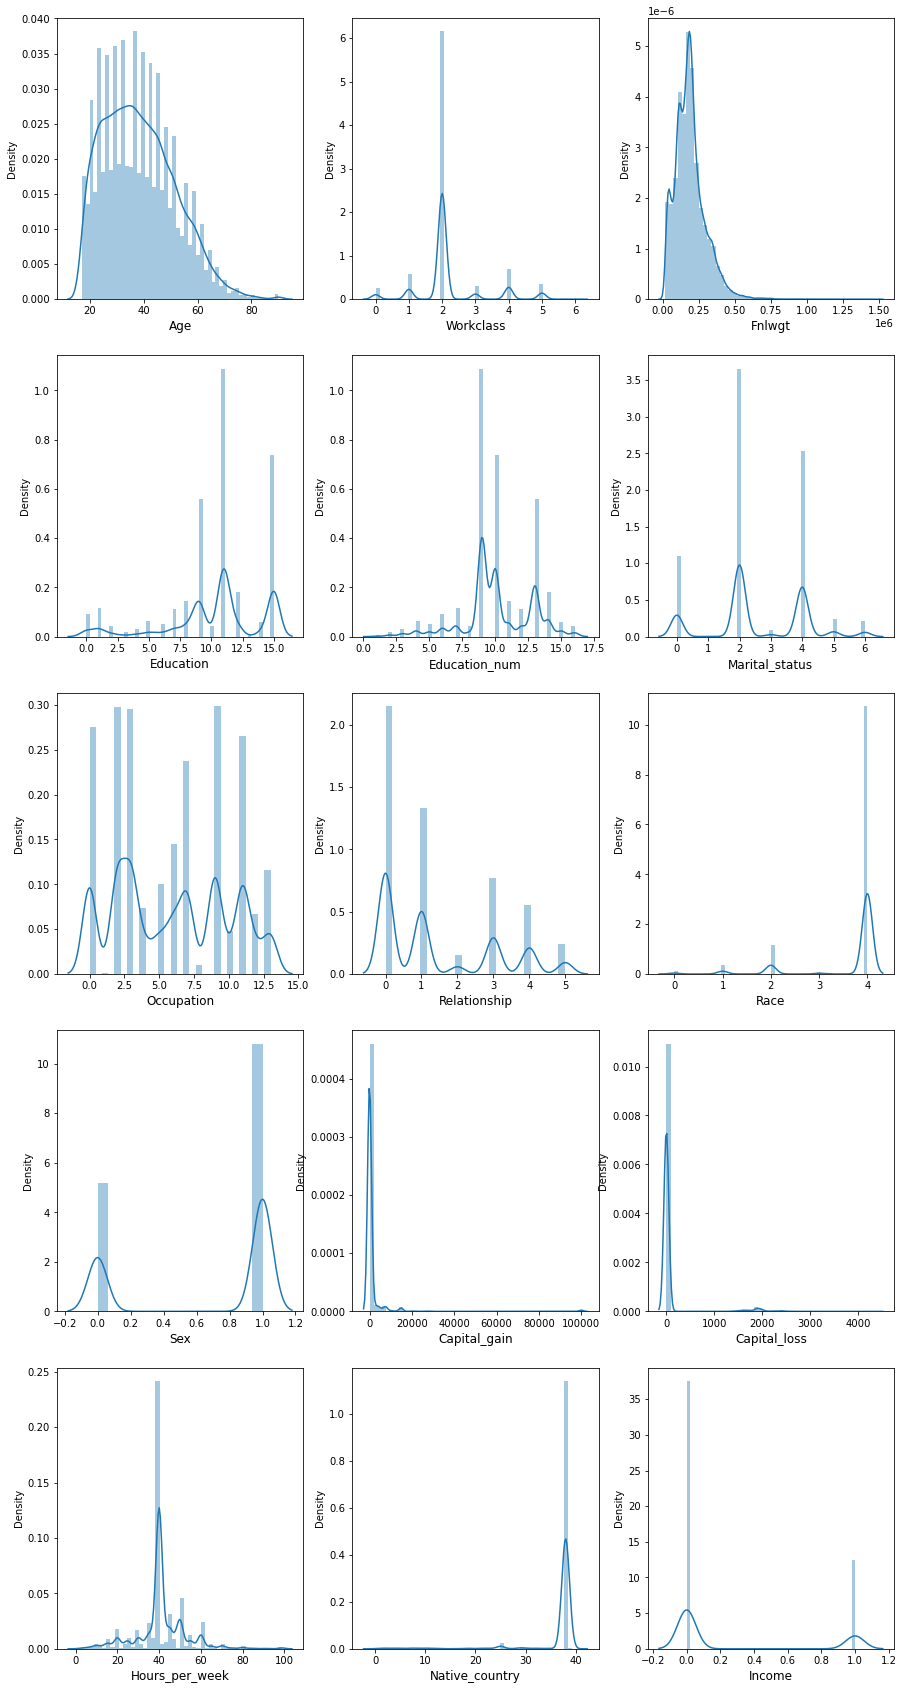

In [588]:
plt.figure(figsize=(15,30))
plotnumber=1

for column in data:
    if plotnumber<=15: #as there are 64 columns in data
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()

### Age and Fnlwgt are the features which are continous in nature and are right skewed soo skewness should be removed 

In [589]:
abs(data.corr()['Income']).sort_values(ascending=True)

Fnlwgt            0.008978
Workclass         0.018103
Native_country    0.023273
Occupation        0.051551
Race              0.071666
Education         0.078981
Capital_loss      0.150050
Marital_status    0.193504
Sex               0.216715
Capital_gain      0.221200
Hours_per_week    0.229480
Age               0.242000
Relationship      0.251009
Education_num     0.335317
Income            1.000000
Name: Income, dtype: float64

<AxesSubplot:title={'center':'Correlation with Income'}>

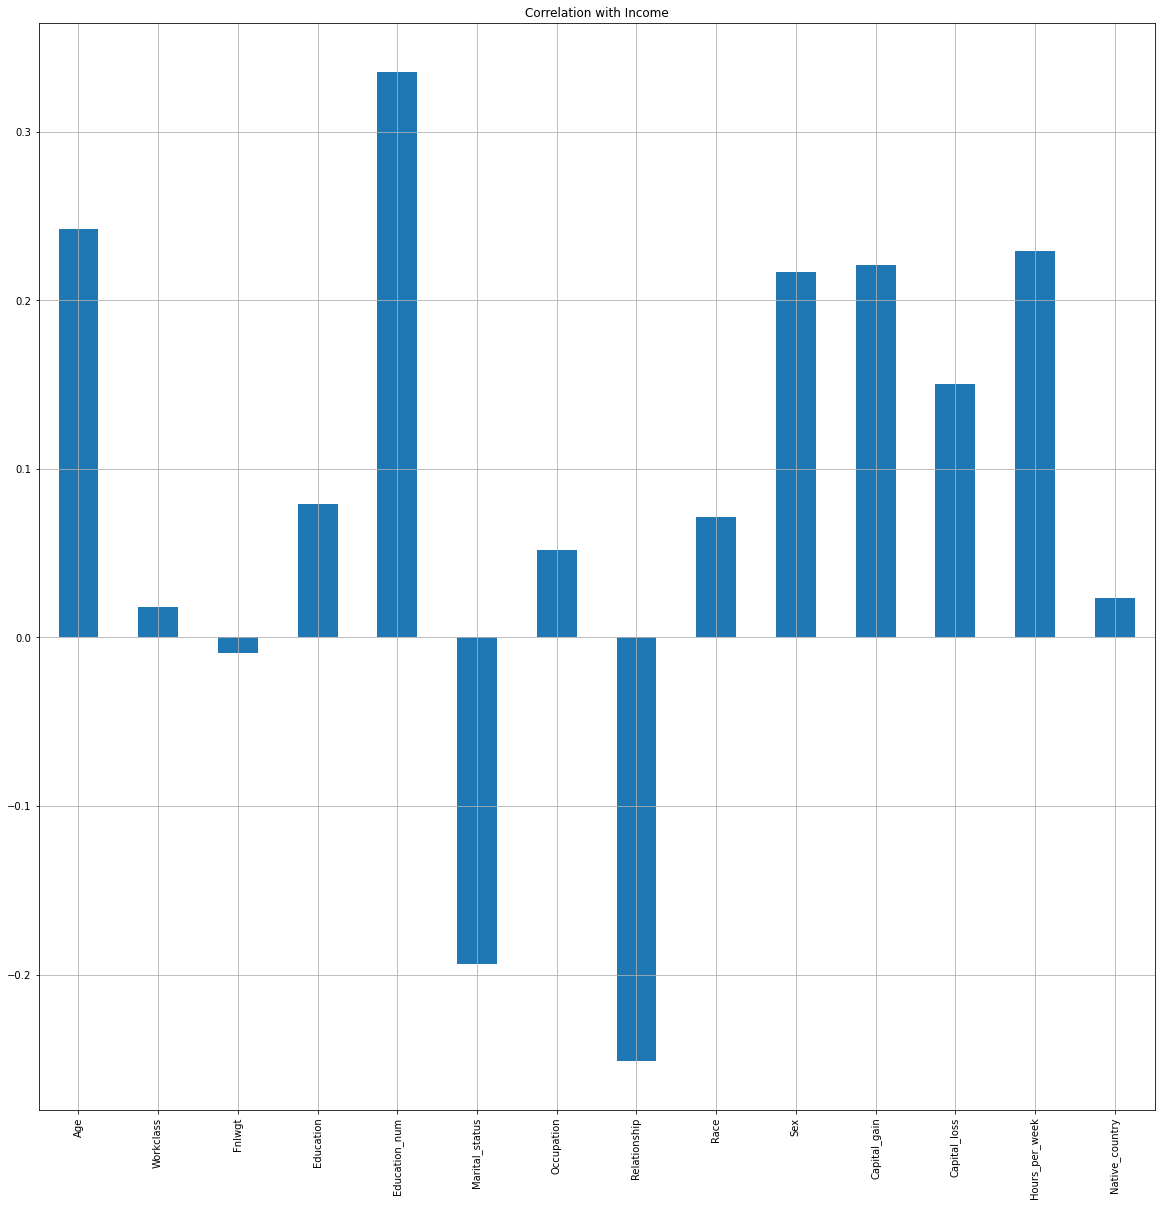

In [590]:
# visualize the correlation
data.drop('Income', axis =1).corrwith(data['Income']).plot(kind ='bar',grid = True, figsize = (20,20),
                                                   title = 'Correlation with Income')

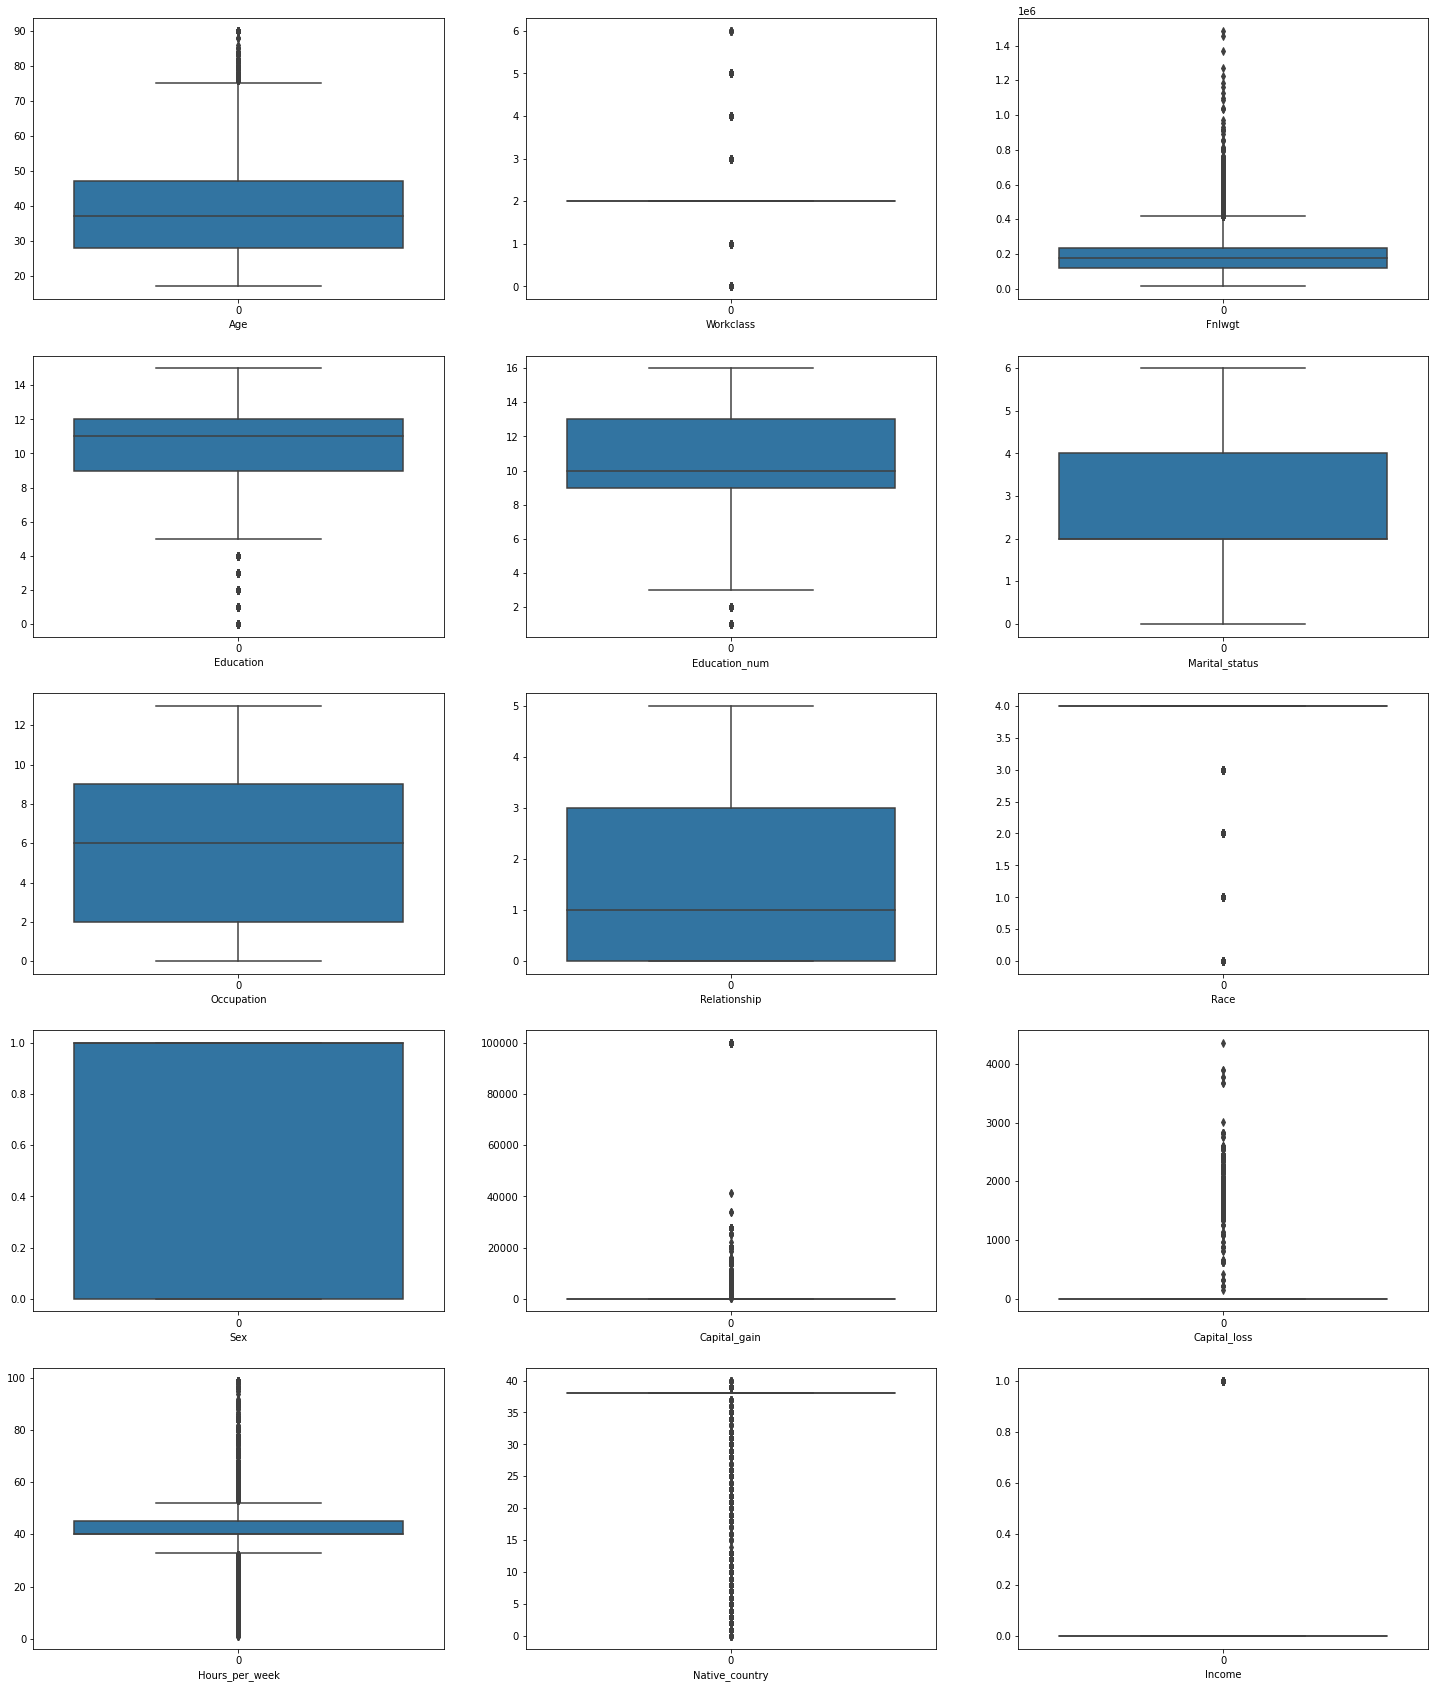

In [591]:
### checking for outliers
plt.figure(figsize=(25,30))
graph=1

for column in data:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

#### Fnlwgt and Age are columns which are having outliers all other are categorical columns

### HeatMap

<function matplotlib.pyplot.show(close=None, block=None)>

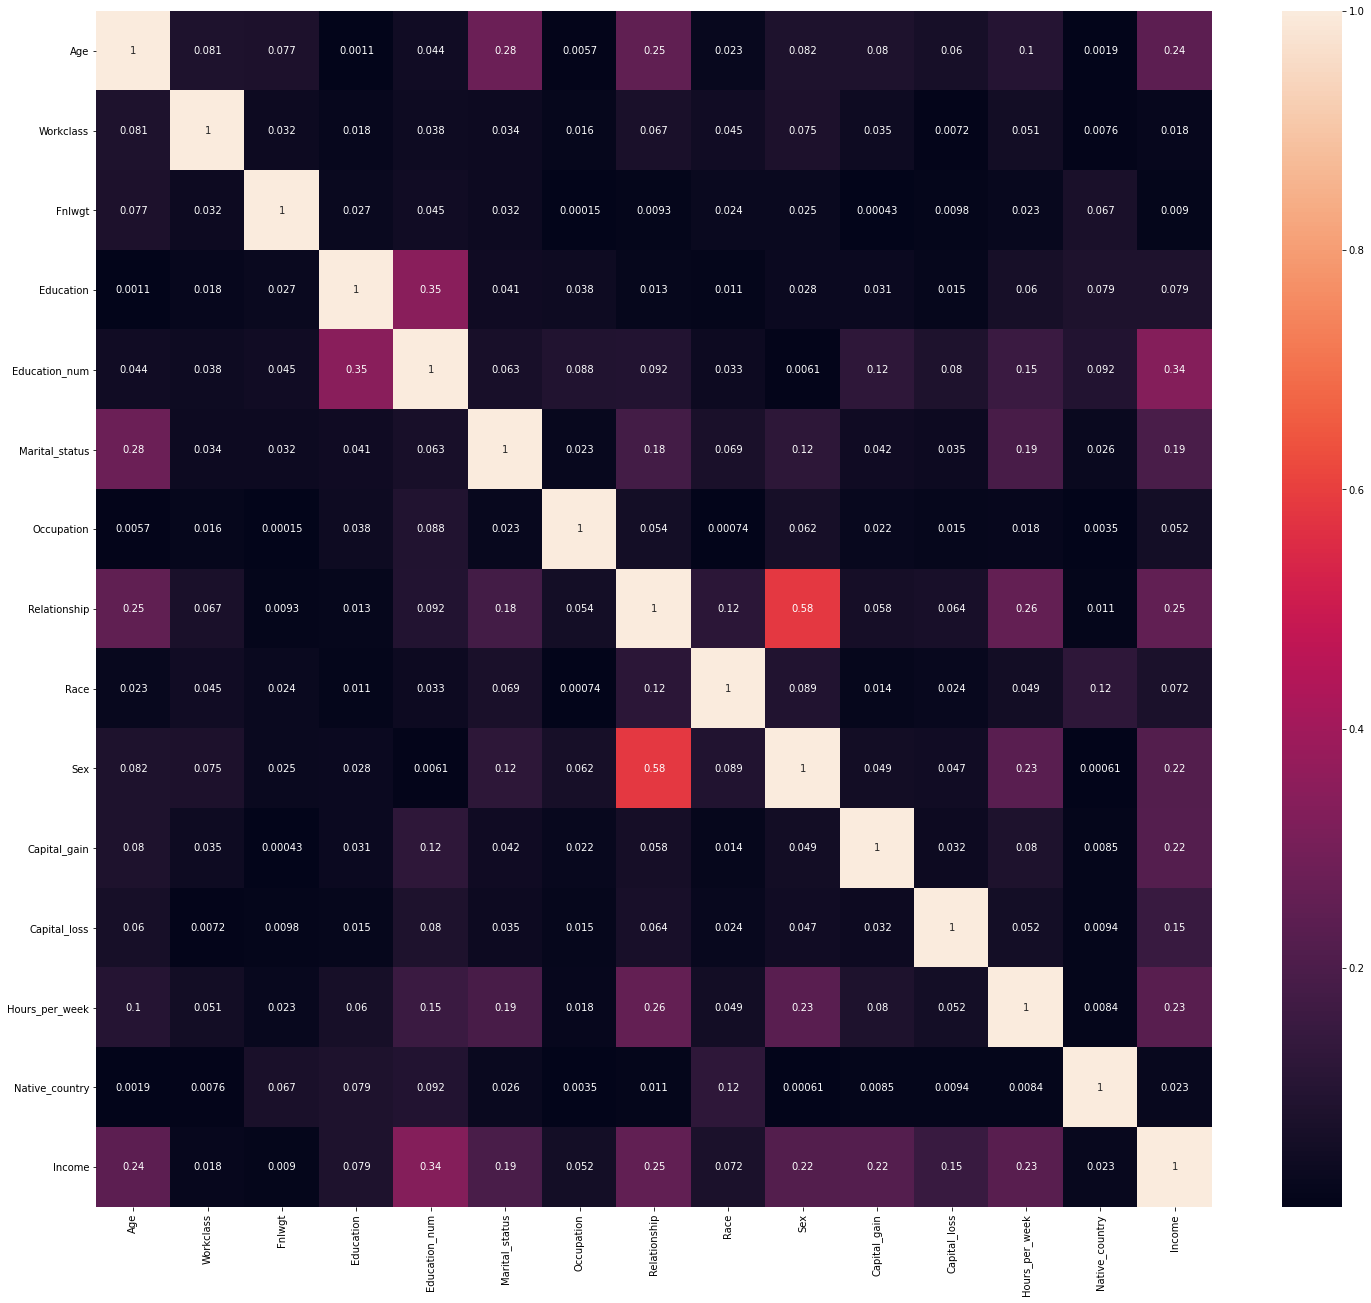

In [592]:
### heatmap
### plotting heatmap
plt.figure(figsize=(25,22))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

#### seems to have no multicolinearity problem cross check it by vif value

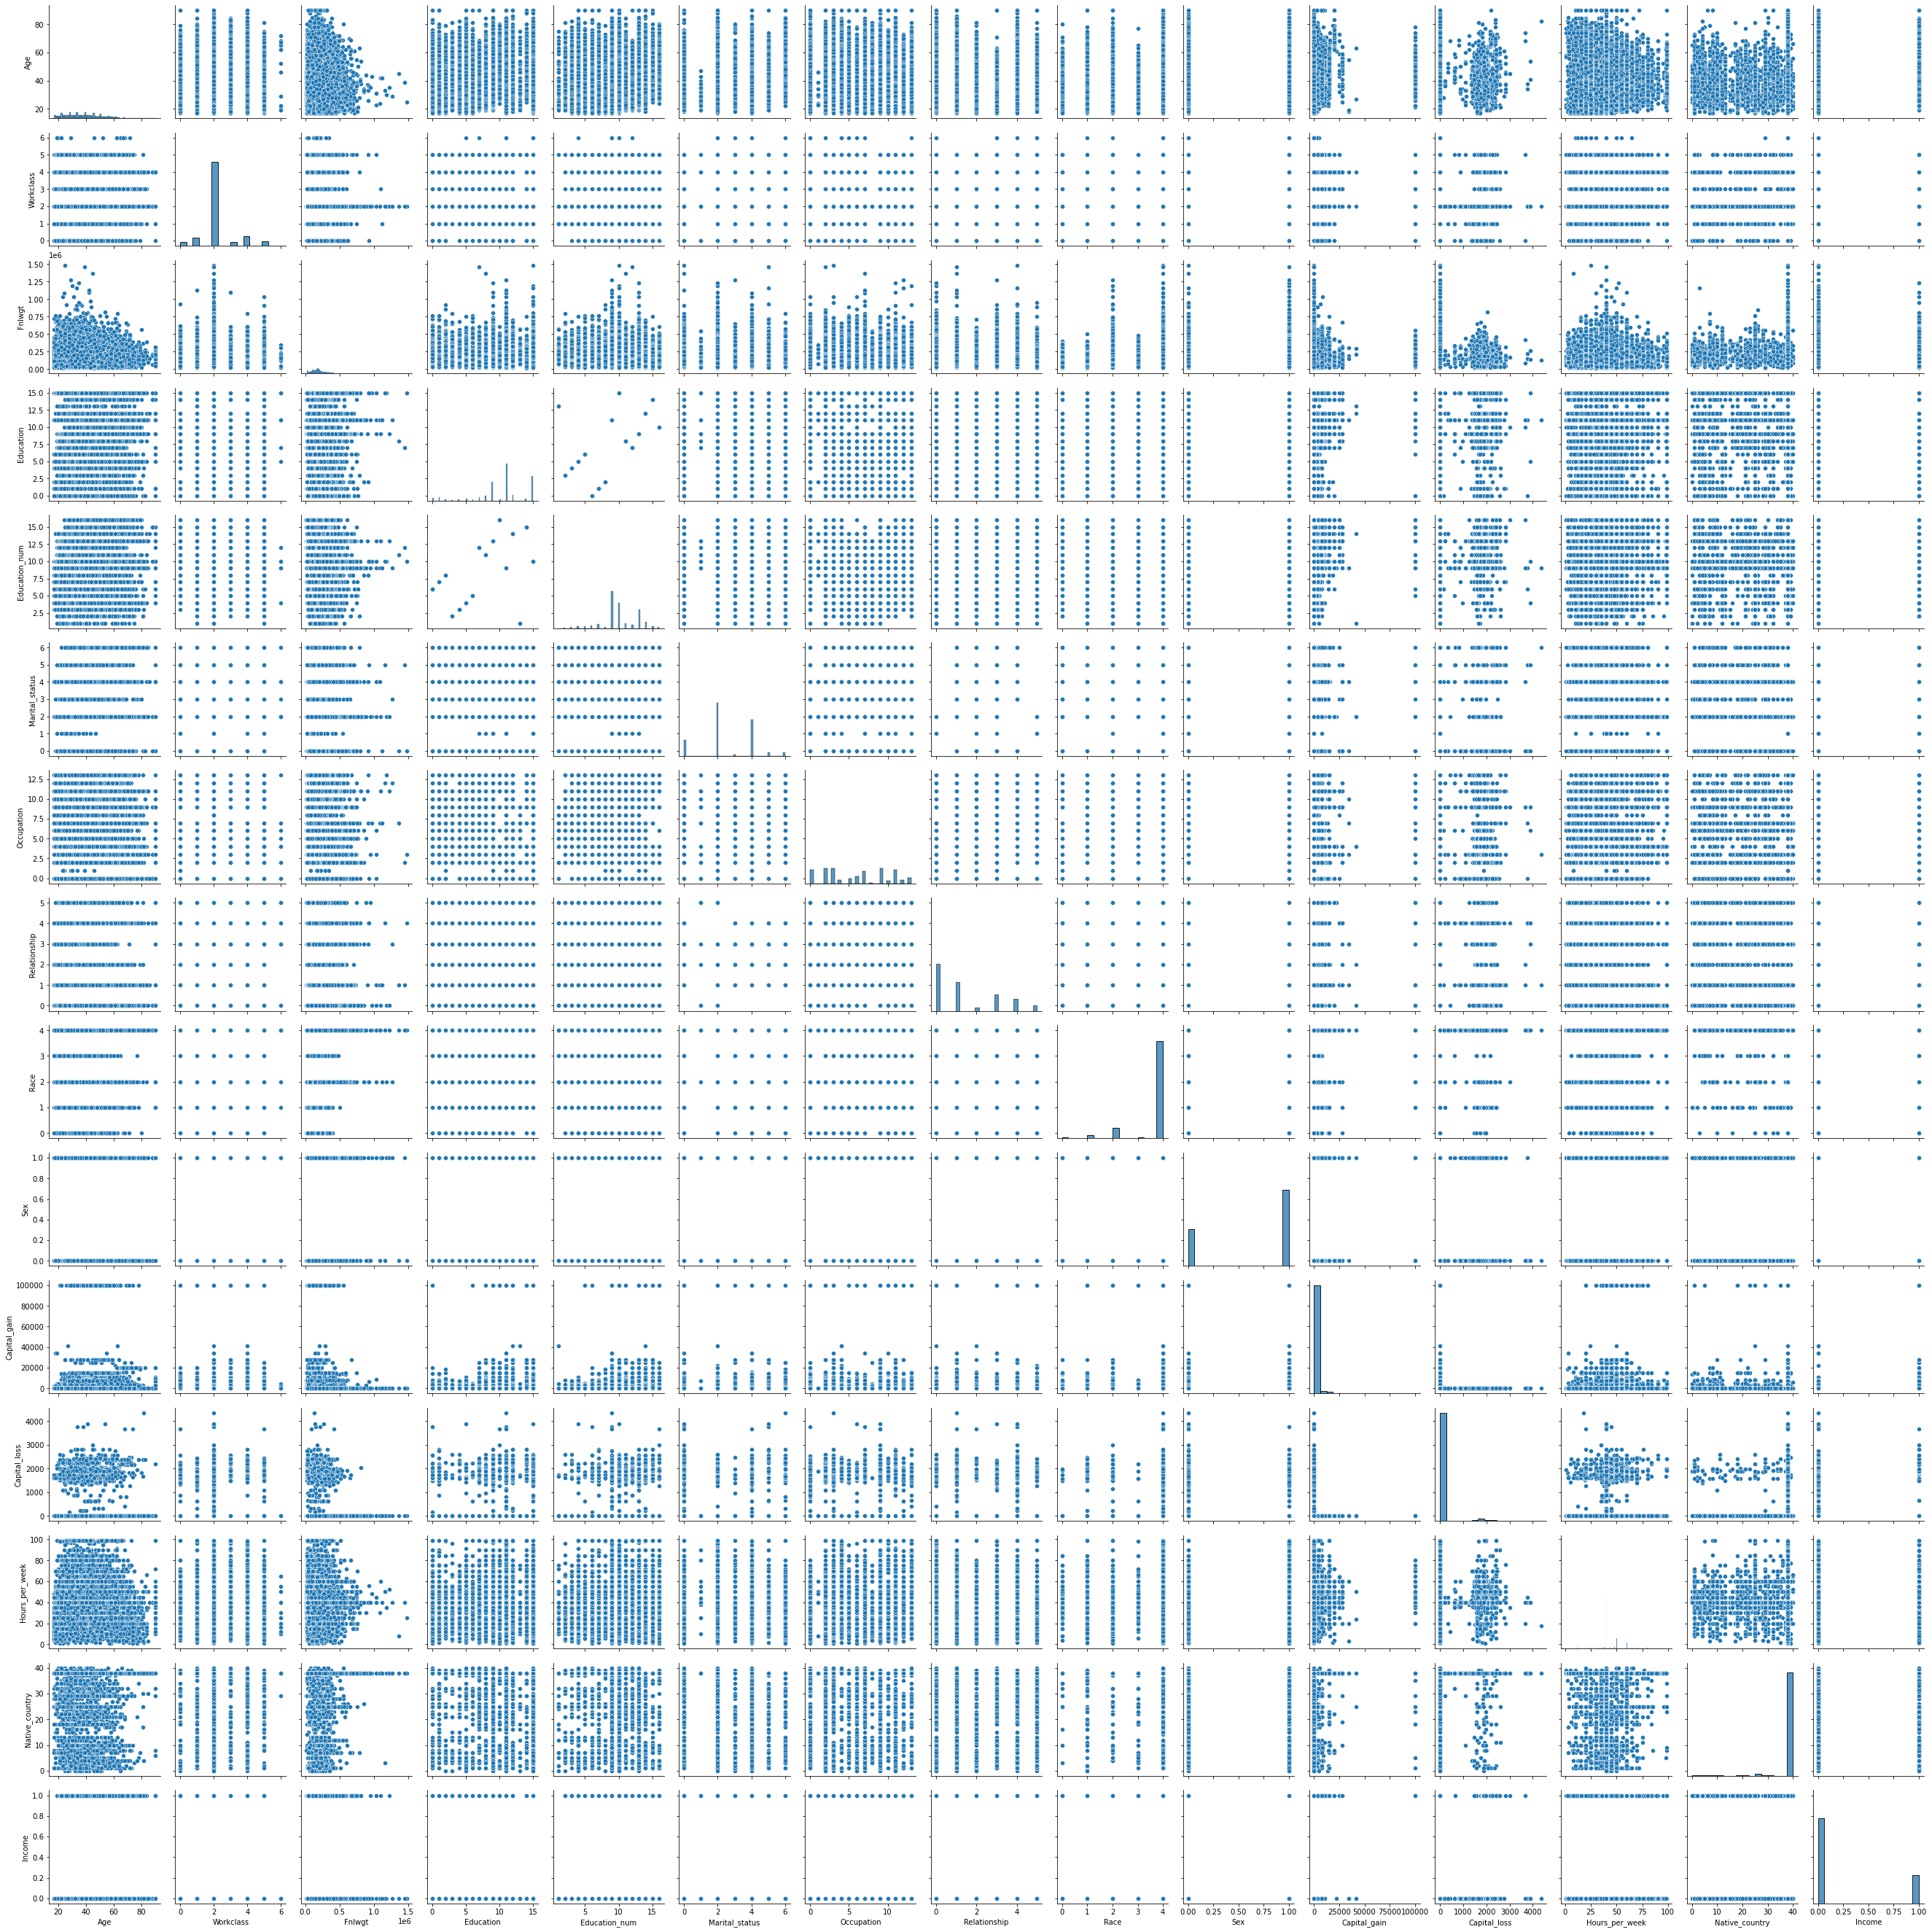

In [593]:
sns.pairplot(data)

### Data preprocessing

## Data preprocessing
- outliers removed - IQR 
- data normalization - power transformer(skewness)
- Vif value for multicolinearity

In [594]:
#quantile 1
q1=data.quantile(0.25)
#QUANTILE 3
q3=data.quantile(0.75)

IQR=q3-q1
IQR

Age                   19.0
Workclass              0.0
Fnlwgt            120002.0
Education              3.0
Education_num          4.0
Marital_status         2.0
Occupation             7.0
Relationship           3.0
Race                   0.0
Sex                    1.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week         5.0
Native_country         0.0
Income                 0.0
dtype: float64

#### Outfiers detection formula
##### higherside==> Q3+(1.5*IQR)
##### lowerside==>Q3 -(1.5*IQR)

In [595]:
itv_high=(q3.Fnlwgt+1.5*IQR.Fnlwgt)
print(itv_high)
index = np.where(data['Fnlwgt']>itv_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

417633.0
(29258, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29253,32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
29254,32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
29255,32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
29256,32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [596]:
itv_high=(q3.Age+1.5*IQR.Age)
print(itv_high)
index = np.where(data['Age']>itv_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

75.5
(29090, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085,32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
29086,32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
29087,32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
29088,32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


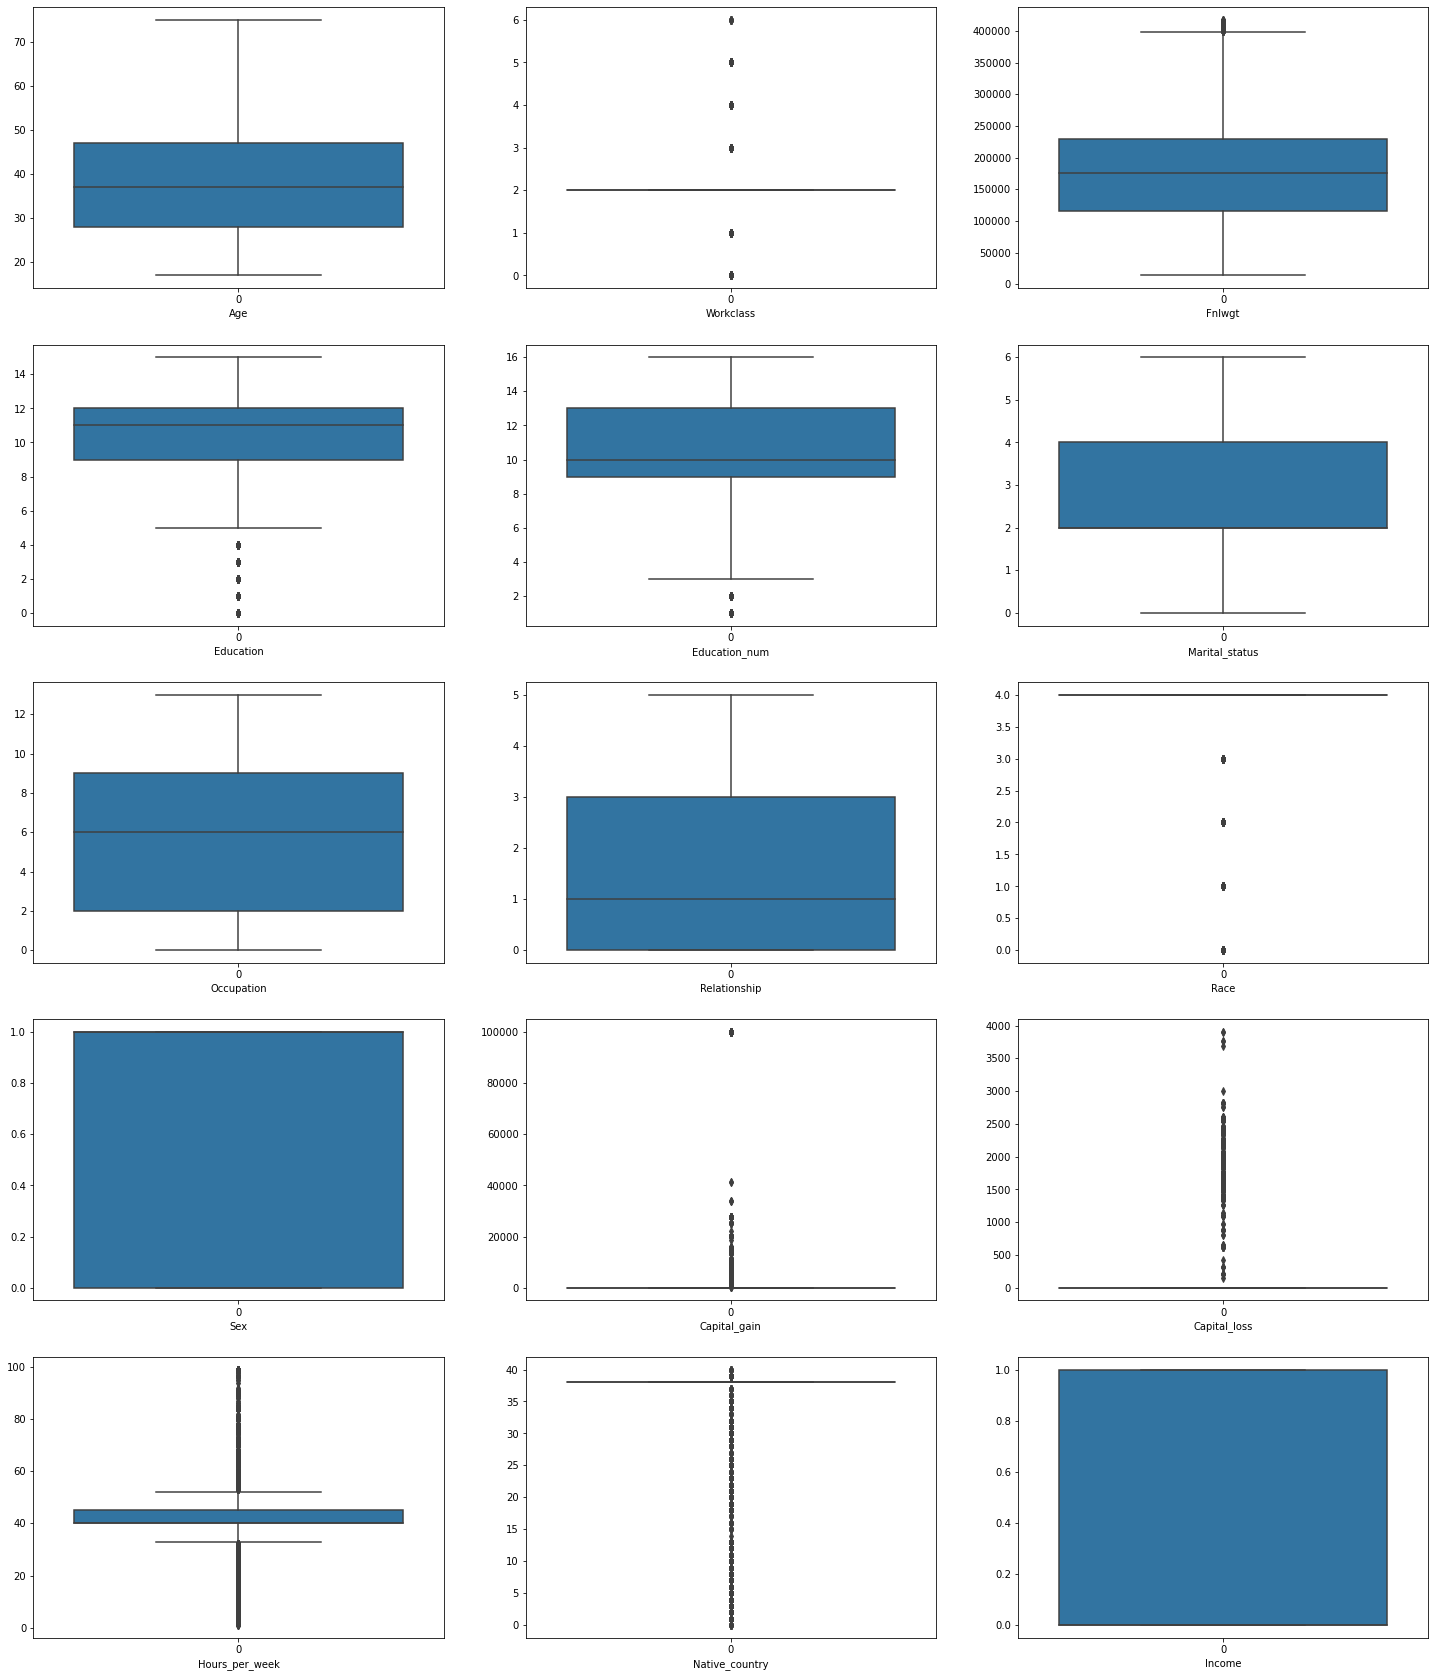

In [597]:
### checking for outliers
plt.figure(figsize=(25,30))
graph=1

for column in data:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [598]:
features = ['Age','Fnlwgt']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
data[features]  = pt.fit_transform(data[features].values)
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.941508,4,-1.119904,9,13,2,3,0,4,1,0,0,13,38,0
1,0.095416,2,0.479453,11,9,0,5,1,4,1,0,0,40,38,0
2,1.130175,2,0.674301,1,7,2,5,0,2,1,0,0,40,38,0
3,-0.768668,2,1.646189,9,13,2,9,5,2,0,0,0,40,4,0
4,0.016805,2,1.157944,12,14,2,3,5,4,0,0,0,40,38,0


### we used box-cox because both features are positive

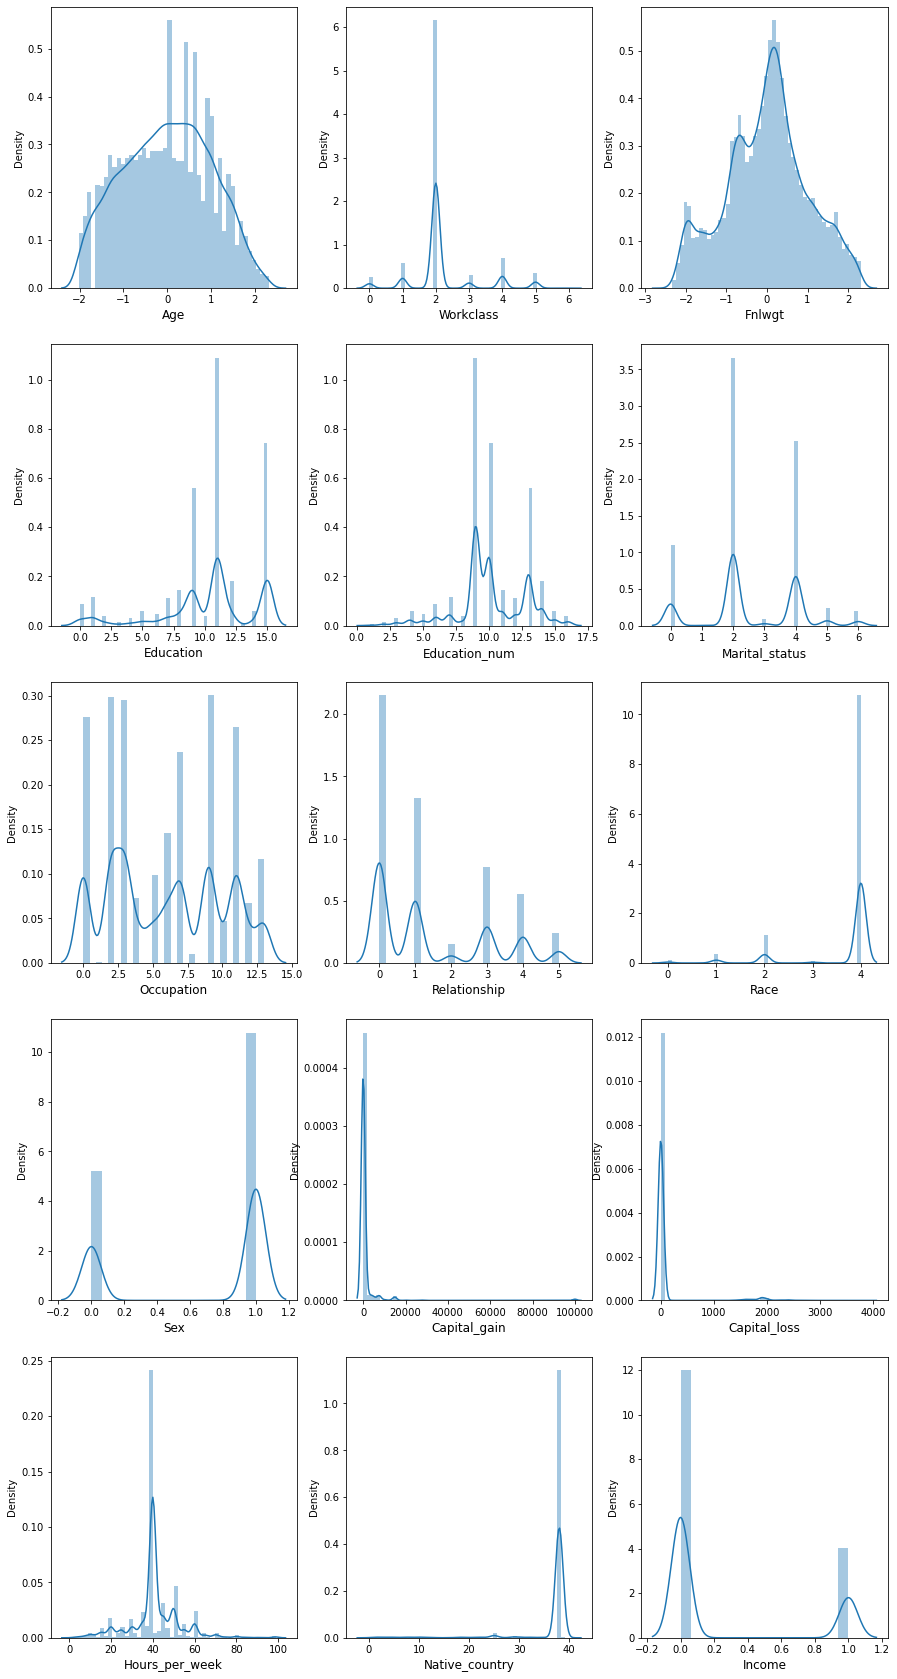

In [599]:
plt.figure(figsize=(15,30))
plotnumber=1

for column in data:
    if plotnumber<=15: #as there are 64 columns in data
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()

#### Data standardization and vif values check for multicollinearity

In [600]:
X = data.drop(columns = ['Income'],axis=1)
y = data['Income']

In [601]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns) 

In [602]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

,vif,Features
0,1.211042,Age
1,1.015078,Workclass
2,1.010444,Fnlwgt
3,1.141279,Education
4,1.201266,Education_num
5,1.158699,Marital_status
6,1.018697,Occupation
7,1.682079,Relationship
8,1.037617,Race
9,1.572660,Sex


#### Vif<5 soo no multicolinearity problem

In [603]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.941508,1.887882,-1.119904,-0.355695,1.129577,-0.38198,-0.734364,-0.885392,0.381470,0.695561,-0.147191,-0.219887,-2.346532,0.26074
1,0.095416,-0.209524,0.479453,0.170544,-0.450297,-1.71922,-0.238274,-0.261593,0.381470,0.695561,-0.147191,-0.219887,-0.085520,0.26074
2,1.130175,-0.209524,0.674301,-2.460652,-1.240234,-0.38198,-0.238274,-0.885392,-2.012439,0.695561,-0.147191,-0.219887,-0.085520,0.26074
3,-0.768668,-0.209524,1.646189,-0.355695,1.129577,-0.38198,0.753907,2.233605,-2.012439,-1.437688,-0.147191,-0.219887,-0.085520,-5.33699
4,0.016805,-0.209524,1.157944,0.433663,1.524546,-0.38198,-0.734364,2.233605,0.381470,-1.437688,-0.147191,-0.219887,-0.085520,0.26074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085,-0.866460,-0.209524,0.897587,-0.881935,0.734609,-0.38198,1.498043,2.233605,0.381470,-1.437688,-0.147191,-0.219887,-0.253003,0.26074
29086,0.248373,-0.209524,-0.194774,0.170544,-0.450297,-0.38198,0.009772,-0.885392,0.381470,0.695561,-0.147191,-0.219887,-0.085520,0.26074
29087,1.428564,-0.209524,-0.223772,0.170544,-0.450297,2.29250,-1.478500,1.609806,0.381470,-1.437688,-0.147191,-0.219887,-0.085520,0.26074
29088,-1.397908,-0.209524,0.330728,0.170544,-0.450297,0.95526,-1.478500,0.986006,0.381470,0.695561,-0.147191,-0.219887,-1.760344,0.26074


### Model Training

In [604]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [605]:
for i in range(500,700):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = i)
    LR.fit(x_train,y_train)
    pred_train = LR.predict(x_train) 
    pred_test = LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy score is',accuracy_score(y_test,pred_test)*100)

At random state 501 model perform very well
At random state 501
Training accuracy score is 82.21467858370573
Testing accuracy score is 82.19319353729804
At random state 502 model perform very well
At random state 502
Training accuracy score is 82.17170849089034
Testing accuracy score is 82.19319353729804
At random state 507 model perform very well
At random state 507
Training accuracy score is 82.21467858370573
Testing accuracy score is 82.15881746304572
At random state 513 model perform very well
At random state 513
Training accuracy score is 82.19749054657957
Testing accuracy score is 82.22756961155036
At random state 539 model perform very well
At random state 539
Training accuracy score is 82.15881746304572
Testing accuracy score is 82.19319353729804
At random state 543 model perform very well
At random state 543
Training accuracy score is 82.15881746304572
Testing accuracy score is 82.22756961155036
At random state 562 model perform very well
At random state 562
Training accuracy 

### Random_State = 543

In [606]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=543)

### Imbalancing check

In [607]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [608]:
print('Training outcome - \n', y_train.value_counts())

Training outcome - 
 0    17433
1     5839
Name: Income, dtype: int64


In [609]:
Counter(y_train)

Counter({0: 17433, 1: 5839})

In [610]:
ove_smp = SMOTE(0.80)
x_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)

print('The no. of classes before fit',format(Counter(y_train)))
print('The no. of classes after fit',format(Counter(y_train_ns)))

The no. of classes before fit Counter({0: 17433, 1: 5839})
The no. of classes after fit Counter({0: 17433, 1: 13946})


### Logistic regression

In [614]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr = LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred = lr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print('Confusion matrix\n',confusion_matrix(y_test,pred))

78.15400481265038
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4380
           1       0.54      0.72      0.62      1438

    accuracy                           0.78      5818
   macro avg       0.72      0.76      0.73      5818
weighted avg       0.81      0.78      0.79      5818

Confusion matrix
 [[3515  865]
 [ 406 1032]]


### Decision Tree

In [615]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt)*100)
print(classification_report(y_test,pred_dt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_dt))

79.28841526297697
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4380
           1       0.57      0.64      0.61      1438

    accuracy                           0.79      5818
   macro avg       0.72      0.74      0.73      5818
weighted avg       0.80      0.79      0.80      5818

Confusion matrix
 [[3689  691]
 [ 514  924]]


### Ensemble technique

### Random forest

In [616]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf)*100)
print(classification_report(y_test,pred_rf))
print('Confusion matrix\n',confusion_matrix(y_test,pred_rf))

84.27294602956343
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4380
           1       0.68      0.69      0.68      1438

    accuracy                           0.84      5818
   macro avg       0.79      0.79      0.79      5818
weighted avg       0.84      0.84      0.84      5818

Confusion matrix
 [[3915  465]
 [ 450  988]]


### Gradient Boosting

In [618]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_gb = gb.predict(x_test)
print(accuracy_score(y_test,pred_gb)*100)
print(classification_report(y_test,pred_gb))
print('Confusion matrix\n',confusion_matrix(y_test,pred_gb))

83.31041595049845
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4380
           1       0.63      0.77      0.70      1438

    accuracy                           0.83      5818
   macro avg       0.78      0.81      0.79      5818
weighted avg       0.85      0.83      0.84      5818

Confusion matrix
 [[3735  645]
 [ 326 1112]]


### Xtreme boosting

In [619]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(x_train_ns,y_train_ns)
pred_xgbt = xgbt.predict(x_test)
print(accuracy_score(y_test,pred_xgbt)*100)
print(classification_report(y_test,pred_xgbt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_xgbt))

[17:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
85.16672396012376
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4380
           1       0.69      0.72      0.71      1438

    accuracy                           0.85      5818
   macro avg       0.80      0.81      0.80      5818
weighted avg       0.85      0.85      0.85      5818

Confusion matrix
 [[3921  459]
 [ 404 1034]]


### SVM

In [621]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_ns,y_train_ns)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc)*100)
print(classification_report(y_test,pred_svc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_svc))

79.85562048814026
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4380
           1       0.56      0.81      0.67      1438

    accuracy                           0.80      5818
   macro avg       0.75      0.80      0.76      5818
weighted avg       0.84      0.80      0.81      5818

Confusion matrix
 [[3480  900]
 [ 272 1166]]


In [622]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 82.1553798556205


In [623]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, X, y, cv=5)
print("Cross validation score of Decision tree model is",scr.mean()*100)

Cross validation score of Decision tree model is 80.57751804743899


In [624]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random forest  model is",scr.mean()*100)

Cross validation score of Random forest  model is 85.24578893090408


In [625]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of gradient boosting model is",scr.mean()*100)

Cross validation score of gradient boosting model is 86.11894121691302


In [626]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of xtreme gradient boosting model is",scr.mean()*100)

[18:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [627]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svc, X, y, cv=5)
print("Cross validation score of support vector machine model is",scr.mean()*100)

Cross validation score of support vector machine model is 84.33482296321759


### ROC-AUC

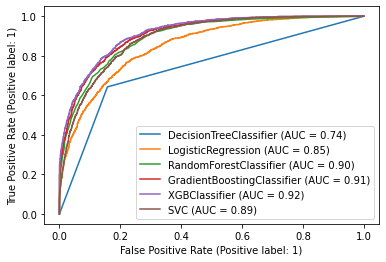

In [629]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(LR, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgbt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.show()

#### Best pick model is Xtreme Gradient boosting 

### Gridsearchcv for hypertuning the model - Xtreme boosting

In [630]:
from sklearn.model_selection import GridSearchCV

X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)
params = {'learning_rate':np.arange(0.2,0.4,0.1),
          'n_estimators':range(10,12),
        'max_depth':range(6,12),
         }
GCV2 = GridSearchCV(xgbt,param_grid = params)
GCV2.fit(X_train,Y_train)
print('best_pram', GCV2.best_params_)

rf=GCV2.best_estimator_ #reinstantiating with best params

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

rf_confusion_mat = confusion_matrix(y_test,y_pred)

print('\nconfusion mat =>','\n',rf_confusion_mat )
print('\naccuracy_score =>','\n',accuracy_score(y_test,y_pred))

[18:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [631]:
import joblib
joblib.dump(GCV2.best_estimator_,'Census.pkl')

['Census.pkl']

In [632]:
model=joblib.load("E:\Datatrained projects\Datatrained-projects\Census\Census.pkl")
y_preds=model.predict(x_test)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,1
1,0
2,0
3,0
4,0
...,...
5813,0
5814,0
5815,0
5816,0


#### Conclusion - 
1) we have model accuracy of 88% after hypertuning the model by gridsearchcv

2) we have applied SMOTE for imbalancing of dataset

3) we have also plotted roc-auc to see area under score

4) xtreme boosting is giving best results